In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2

%matplotlib notebook

In [2]:
exp_dir = '/home/manor/anaconda3/envs/openAIenv/baselines/models/BreakoutNoFrameskip-v4_4e7_a2c_exp_2019-09-28_11-00-00'
obs_dir = os.path.join(exp_dir, 'obs_dir')
other_dir = os.path.join(exp_dir, 'other_info')
exp_dir = os.path.abspath(exp_dir)
obs_dir = os.path.abspath(obs_dir)
other_dir = os.path.abspath(other_dir)
assert os.path.exists(exp_dir)
assert os.path.exists(obs_dir)
assert os.path.exists(other_dir)

os.chdir(exp_dir)

In [3]:
obs = []
for obs_file in os.listdir(obs_dir):
    obs.append(np.load(os.path.join(obs_dir, obs_file)))
    
obs = np.concatenate([o for o in obs], axis=0)
print("[t-SNE GEN] - obs shape : {}, obs dtype: {}".format(obs.shape, obs.dtype))

[t-SNE GEN] - obs shape : (26542, 84, 84, 4), obs dtype: uint8


In [4]:
def get_padel_position(obs=None, method=cv2.TM_CCOEFF_NORMED):
    """
    return the avg. location of the padel over 4 consequtive observations
    obs: np.ndarray.shape = (3,74). obs is the buttom part of the image, where the padel is.
                                    we assume only the last frame in each observation as the
                                    relevant for the current location (the others are there to give the
                                    network a sense of motion).
    method: string in [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
                       cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
    """
    assert obs is not None
    assert obs.shape[0] == 3 and obs.shape[1] == 74
    assert obs.dtype in [np.uint8, np.float32]
    assert method in [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
                      cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
    
    padel_filter = np.array(([44, 44, 44, 44, 44],
                             [110, 110, 110, 110, 110],
                             [22, 22, 22, 22, 22]),dtype=np.uint8)
    w, h = padel_filter.shape[::-1]
    
    res = cv2.matchTemplate(obs, padel_filter, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        center = min_loc + np.array([w/2, h/2])
    else:
        center = max_loc + np.array([w/2, h/2])
     
    center += [5, 75]
    print(max_loc, center)
    return center

(2, 0) [ 9.5 76.5]


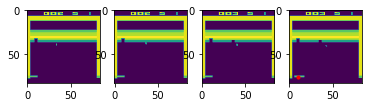

In [5]:
center = get_padel_position(obs[102,75:78,5:79,3])

def plot_obs_with_padel_pos(obs, center):
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(obs[:,:,0])
    ax[1].imshow(obs[:,:,1])
    ax[2].imshow(obs[:,:,2])
    ax[3].imshow(obs[:,:,3])
    ax[3].scatter(center[0], center[1], s=10, c='red', marker='o')
    plt.show()
    
plot_obs_with_padel_pos(obs[102,:,:,:], center)

In [6]:
centers = []
for i in range(obs.shape[0]):
    obs_f = obs[i,:,:,3]
    obs_s = obs_f[75:78,5:79]
    print('{}) '.format(i), end=' ')
    center, res = get_padel_position(obs_s,cv2.TM_CCORR_NORMED)
    centers.append(center)
np.save(os.path.join(exp_dir, "padel_positions.npy"), np.array(centers))

0)  (63, 0) [70.5 76.5]
1)  (65, 0) [72.5 76.5]
2)  (60, 0) [67.5 76.5]
3)  (53, 0) [60.5 76.5]
4)  (52, 0) [59.5 76.5]
5)  (58, 0) [65.5 76.5]
6)  (53, 0) [60.5 76.5]
7)  (41, 0) [48.5 76.5]
8)  (35, 0) [42.5 76.5]
9)  (35, 0) [42.5 76.5]
10)  (35, 0) [42.5 76.5]
11)  (38, 0) [45.5 76.5]
12)  (35, 0) [42.5 76.5]
13)  (30, 0) [37.5 76.5]
14)  (24, 0) [31.5 76.5]
15)  (24, 0) [31.5 76.5]
16)  (24, 0) [31.5 76.5]
17)  (28, 0) [35.5 76.5]
18)  (34, 0) [41.5 76.5]
19)  (39, 0) [46.5 76.5]
20)  (47, 0) [54.5 76.5]
21)  (47, 0) [54.5 76.5]
22)  (41, 0) [48.5 76.5]
23)  (35, 0) [42.5 76.5]
24)  (35, 0) [42.5 76.5]
25)  (35, 0) [42.5 76.5]
26)  (35, 0) [42.5 76.5]
27)  (35, 0) [42.5 76.5]
28)  (39, 0) [46.5 76.5]
29)  (47, 0) [54.5 76.5]
30)  (41, 0) [48.5 76.5]
31)  (30, 0) [37.5 76.5]
32)  (28, 0) [35.5 76.5]
33)  (29, 0) [36.5 76.5]
34)  (28, 0) [35.5 76.5]
35)  (34, 0) [41.5 76.5]
36)  (35, 0) [42.5 76.5]
37)  (29, 0) [36.5 76.5]
38)  (24, 0) [31.5 76.5]
39)  (24, 0) [31.5 76.5]
40)  (24, 

529)  (69, 0) [76.5 76.5]
530)  (69, 0) [76.5 76.5]
531)  (63, 0) [70.5 76.5]
532)  (58, 0) [65.5 76.5]
533)  (58, 0) [65.5 76.5]
534)  (58, 0) [65.5 76.5]
535)  (52, 0) [59.5 76.5]
536)  (46, 0) [53.5 76.5]
537)  (40, 0) [47.5 76.5]
538)  (38, 0) [45.5 76.5]
539)  (45, 0) [52.5 76.5]
540)  (50, 0) [57.5 76.5]
541)  (57, 0) [64.5 76.5]
542)  (58, 0) [65.5 76.5]
543)  (52, 0) [59.5 76.5]
544)  (46, 0) [53.5 76.5]
545)  (40, 0) [47.5 76.5]
546)  (34, 0) [41.5 76.5]
547)  (28, 0) [35.5 76.5]
548)  (22, 0) [29.5 76.5]
549)  (22, 0) [29.5 76.5]
550)  (22, 0) [29.5 76.5]
551)  (22, 0) [29.5 76.5]
552)  (22, 0) [29.5 76.5]
553)  (22, 0) [29.5 76.5]
554)  (21, 0) [28.5 76.5]
555)  (25, 0) [32.5 76.5]
556)  (33, 0) [40.5 76.5]
557)  (28, 0) [35.5 76.5]
558)  (15, 0) [22.5 76.5]
559)  (10, 0) [17.5 76.5]
560)  (10, 0) [17.5 76.5]
561)  (10, 0) [17.5 76.5]
562)  (3, 0) [10.5 76.5]
563)  (0, 0) [ 7.5 76.5]
564)  (2, 0) [ 9.5 76.5]
565)  (9, 0) [16.5 76.5]
566)  (10, 0) [17.5 76.5]
567)  (13, 0) [2

1015)  (37, 0) [44.5 76.5]
1016)  (45, 0) [52.5 76.5]
1017)  (45, 0) [52.5 76.5]
1018)  (45, 0) [52.5 76.5]
1019)  (45, 0) [52.5 76.5]
1020)  (45, 0) [52.5 76.5]
1021)  (45, 0) [52.5 76.5]
1022)  (45, 0) [52.5 76.5]
1023)  (45, 0) [52.5 76.5]
1024)  (45, 0) [52.5 76.5]
1025)  (40, 0) [47.5 76.5]
1026)  (34, 0) [41.5 76.5]
1027)  (35, 0) [42.5 76.5]
1028)  (37, 0) [44.5 76.5]
1029)  (45, 0) [52.5 76.5]
1030)  (45, 0) [52.5 76.5]
1031)  (45, 0) [52.5 76.5]
1032)  (45, 0) [52.5 76.5]
1033)  (45, 0) [52.5 76.5]
1034)  (40, 0) [47.5 76.5]
1035)  (34, 0) [41.5 76.5]
1036)  (35, 0) [42.5 76.5]
1037)  (35, 0) [42.5 76.5]
1038)  (35, 0) [42.5 76.5]
1039)  (37, 0) [44.5 76.5]
1040)  (45, 0) [52.5 76.5]
1041)  (45, 0) [52.5 76.5]
1042)  (45, 0) [52.5 76.5]
1043)  (40, 0) [47.5 76.5]
1044)  (34, 0) [41.5 76.5]
1045)  (35, 0) [42.5 76.5]
1046)  (35, 0) [42.5 76.5]
1047)  (35, 0) [42.5 76.5]
1048)  (37, 0) [44.5 76.5]
1049)  (45, 0) [52.5 76.5]
1050)  (45, 0) [52.5 76.5]
1051)  (45, 0) [52.5 76.5]
1

1504)  (69, 0) [76.5 76.5]
1505)  (63, 0) [70.5 76.5]
1506)  (58, 0) [65.5 76.5]
1507)  (62, 0) [69.5 76.5]
1508)  (69, 0) [76.5 76.5]
1509)  (69, 0) [76.5 76.5]
1510)  (63, 0) [70.5 76.5]
1511)  (52, 0) [59.5 76.5]
1512)  (46, 0) [53.5 76.5]
1513)  (50, 0) [57.5 76.5]
1514)  (61, 0) [68.5 76.5]
1515)  (69, 0) [76.5 76.5]
1516)  (69, 0) [76.5 76.5]
1517)  (63, 0) [70.5 76.5]
1518)  (58, 0) [65.5 76.5]
1519)  (52, 0) [59.5 76.5]
1520)  (46, 0) [53.5 76.5]
1521)  (40, 0) [47.5 76.5]
1522)  (34, 0) [41.5 76.5]
1523)  (38, 0) [45.5 76.5]
1524)  (45, 0) [52.5 76.5]
1525)  (45, 0) [52.5 76.5]
1526)  (50, 0) [57.5 76.5]
1527)  (57, 0) [64.5 76.5]
1528)  (58, 0) [65.5 76.5]
1529)  (61, 0) [68.5 76.5]
1530)  (63, 0) [70.5 76.5]
1531)  (52, 0) [59.5 76.5]
1532)  (40, 0) [47.5 76.5]
1533)  (38, 0) [45.5 76.5]
1534)  (39, 0) [46.5 76.5]
1535)  (38, 0) [45.5 76.5]
1536)  (45, 0) [52.5 76.5]
1537)  (40, 0) [47.5 76.5]
1538)  (28, 0) [35.5 76.5]
1539)  (26, 0) [33.5 76.5]
1540)  (33, 0) [40.5 76.5]
1

2031)  (2, 0) [ 9.5 76.5]
2032)  (3, 0) [10.5 76.5]
2033)  (0, 0) [ 7.5 76.5]
2034)  (0, 0) [ 7.5 76.5]
2035)  (0, 0) [ 7.5 76.5]
2036)  (0, 0) [ 7.5 76.5]
2037)  (0, 0) [ 7.5 76.5]
2038)  (0, 0) [ 7.5 76.5]
2039)  (0, 0) [ 7.5 76.5]
2040)  (2, 0) [ 9.5 76.5]
2041)  (3, 0) [10.5 76.5]
2042)  (0, 0) [ 7.5 76.5]
2043)  (0, 0) [ 7.5 76.5]
2044)  (0, 0) [ 7.5 76.5]
2045)  (0, 0) [ 7.5 76.5]
2046)  (0, 0) [ 7.5 76.5]
2047)  (0, 0) [ 7.5 76.5]
2048)  (2, 0) [ 9.5 76.5]
2049)  (3, 0) [10.5 76.5]
2050)  (2, 0) [ 9.5 76.5]
2051)  (9, 0) [16.5 76.5]
2052)  (13, 0) [20.5 76.5]
2053)  (21, 0) [28.5 76.5]
2054)  (21, 0) [28.5 76.5]
2055)  (21, 0) [28.5 76.5]
2056)  (25, 0) [32.5 76.5]
2057)  (33, 0) [40.5 76.5]
2058)  (37, 0) [44.5 76.5]
2059)  (39, 0) [46.5 76.5]
2060)  (34, 0) [41.5 76.5]
2061)  (35, 0) [42.5 76.5]
2062)  (37, 0) [44.5 76.5]
2063)  (39, 0) [46.5 76.5]
2064)  (38, 0) [45.5 76.5]
2065)  (45, 0) [52.5 76.5]
2066)  (50, 0) [57.5 76.5]
2067)  (61, 0) [68.5 76.5]
2068)  (69, 0) [76.5 7

2518)  (25, 0) [32.5 76.5]
2519)  (27, 0) [34.5 76.5]
2520)  (22, 0) [29.5 76.5]
2521)  (25, 0) [32.5 76.5]
2522)  (33, 0) [40.5 76.5]
2523)  (34, 0) [41.5 76.5]
2524)  (37, 0) [44.5 76.5]
2525)  (39, 0) [46.5 76.5]
2526)  (25, 0) [32.5 76.5]
2527)  (45, 0) [52.5 76.5]
2528)  (45, 0) [52.5 76.5]
2529)  (45, 0) [52.5 76.5]
2530)  (40, 0) [47.5 76.5]
2531)  (34, 0) [41.5 76.5]
2532)  (34, 0) [41.5 76.5]
2533)  (34, 0) [41.5 76.5]
2534)  (34, 0) [41.5 76.5]
2535)  (34, 0) [41.5 76.5]
2536)  (34, 0) [41.5 76.5]
2537)  (37, 0) [44.5 76.5]
2538)  (34, 0) [41.5 76.5]
2539)  (28, 0) [35.5 76.5]
2540)  (22, 0) [29.5 76.5]
2541)  (22, 0) [29.5 76.5]
2542)  (25, 0) [32.5 76.5]
2543)  (27, 0) [34.5 76.5]
2544)  (26, 0) [33.5 76.5]
2545)  (33, 0) [40.5 76.5]
2546)  (34, 0) [41.5 76.5]
2547)  (37, 0) [44.5 76.5]
2548)  (45, 0) [52.5 76.5]
2549)  (40, 0) [47.5 76.5]
2550)  (38, 0) [45.5 76.5]
2551)  (39, 0) [46.5 76.5]
2552)  (28, 0) [35.5 76.5]
2553)  (22, 0) [29.5 76.5]
2554)  (22, 0) [29.5 76.5]
2

3044)  (0, 0) [ 7.5 76.5]
3045)  (0, 0) [ 7.5 76.5]
3046)  (2, 0) [ 9.5 76.5]
3047)  (3, 0) [10.5 76.5]
3048)  (0, 0) [ 7.5 76.5]
3049)  (2, 0) [ 9.5 76.5]
3050)  (9, 0) [16.5 76.5]
3051)  (13, 0) [20.5 76.5]
3052)  (25, 0) [32.5 76.5]
3053)  (33, 0) [40.5 76.5]
3054)  (37, 0) [44.5 76.5]
3055)  (49, 0) [56.5 76.5]
3056)  (57, 0) [64.5 76.5]
3057)  (52, 0) [59.5 76.5]
3058)  (46, 0) [53.5 76.5]
3059)  (46, 0) [53.5 76.5]
3060)  (47, 0) [54.5 76.5]
3061)  (40, 0) [47.5 76.5]
3062)  (34, 0) [41.5 76.5]
3063)  (35, 0) [42.5 76.5]
3064)  (37, 0) [44.5 76.5]
3065)  (45, 0) [52.5 76.5]
3066)  (50, 0) [57.5 76.5]
3067)  (57, 0) [64.5 76.5]
3068)  (58, 0) [65.5 76.5]
3069)  (61, 0) [68.5 76.5]
3070)  (69, 0) [76.5 76.5]
3071)  (69, 0) [76.5 76.5]
3072)  (63, 0) [70.5 76.5]
3073)  (58, 0) [65.5 76.5]
3074)  (58, 0) [65.5 76.5]
3075)  (52, 0) [59.5 76.5]
3076)  (50, 0) [57.5 76.5]
3077)  (57, 0) [64.5 76.5]
3078)  (52, 0) [59.5 76.5]
3079)  (46, 0) [53.5 76.5]
3080)  (50, 0) [57.5 76.5]
3081)  (

3540)  (39, 0) [46.5 76.5]
3541)  (47, 0) [54.5 76.5]
3542)  (47, 0) [54.5 76.5]
3543)  (47, 0) [54.5 76.5]
3544)  (47, 0) [54.5 76.5]
3545)  (52, 0) [59.5 76.5]
3546)  (53, 0) [60.5 76.5]
3547)  (48, 0) [55.5 76.5]
3548)  (41, 0) [48.5 76.5]
3549)  (35, 0) [42.5 76.5]
3550)  (39, 0) [46.5 76.5]
3551)  (41, 0) [48.5 76.5]
3552)  (30, 0) [37.5 76.5]
3553)  (24, 0) [31.5 76.5]
3554)  (17, 0) [24.5 76.5]
3555)  (5, 0) [12.5 76.5]
3556)  (0, 0) [ 7.5 76.5]
3557)  (0, 0) [ 7.5 76.5]
3558)  (0, 0) [ 7.5 76.5]
3559)  (0, 0) [ 7.5 76.5]
3560)  (0, 0) [ 7.5 76.5]
3561)  (0, 0) [ 7.5 76.5]
3562)  (0, 0) [ 7.5 76.5]
3563)  (0, 0) [ 7.5 76.5]
3564)  (0, 0) [ 7.5 76.5]
3565)  (0, 0) [ 7.5 76.5]
3566)  (2, 0) [ 9.5 76.5]
3567)  (13, 0) [20.5 76.5]
3568)  (21, 0) [28.5 76.5]
3569)  (25, 0) [32.5 76.5]
3570)  (37, 0) [44.5 76.5]
3571)  (49, 0) [56.5 76.5]
3572)  (61, 0) [68.5 76.5]
3573)  (69, 0) [76.5 76.5]
3574)  (63, 0) [70.5 76.5]
3575)  (52, 0) [59.5 76.5]
3576)  (50, 0) [57.5 76.5]
3577)  (57, 0

4036)  (40, 0) [47.5 76.5]
4037)  (34, 0) [41.5 76.5]
4038)  (28, 0) [35.5 76.5]
4039)  (15, 0) [22.5 76.5]
4040)  (3, 0) [10.5 76.5]
4041)  (7, 0) [14.5 76.5]
4042)  (9, 0) [16.5 76.5]
4043)  (10, 0) [17.5 76.5]
4044)  (13, 0) [20.5 76.5]
4045)  (15, 0) [22.5 76.5]
4046)  (3, 0) [10.5 76.5]
4047)  (2, 0) [ 9.5 76.5]
4048)  (9, 0) [16.5 76.5]
4049)  (10, 0) [17.5 76.5]
4050)  (3, 0) [10.5 76.5]
4051)  (2, 0) [ 9.5 76.5]
4052)  (13, 0) [20.5 76.5]
4053)  (21, 0) [28.5 76.5]
4054)  (21, 0) [28.5 76.5]
4055)  (25, 0) [32.5 76.5]
4056)  (37, 0) [44.5 76.5]
4057)  (49, 0) [56.5 76.5]
4058)  (57, 0) [64.5 76.5]
4059)  (52, 0) [59.5 76.5]
4060)  (46, 0) [53.5 76.5]
4061)  (46, 0) [53.5 76.5]
4062)  (40, 0) [47.5 76.5]
4063)  (34, 0) [41.5 76.5]
4064)  (34, 0) [41.5 76.5]
4065)  (34, 0) [41.5 76.5]
4066)  (34, 0) [41.5 76.5]
4067)  (37, 0) [44.5 76.5]
4068)  (45, 0) [52.5 76.5]
4069)  (45, 0) [52.5 76.5]
4070)  (45, 0) [52.5 76.5]
4071)  (45, 0) [52.5 76.5]
4072)  (45, 0) [52.5 76.5]
4073)  (5

4613)  (45, 0) [52.5 76.5]
4614)  (45, 0) [52.5 76.5]
4615)  (45, 0) [52.5 76.5]
4616)  (45, 0) [52.5 76.5]
4617)  (45, 0) [52.5 76.5]
4618)  (50, 0) [57.5 76.5]
4619)  (51, 0) [58.5 76.5]
4620)  (46, 0) [53.5 76.5]
4621)  (46, 0) [53.5 76.5]
4622)  (46, 0) [53.5 76.5]
4623)  (46, 0) [53.5 76.5]
4624)  (46, 0) [53.5 76.5]
4625)  (48, 0) [55.5 76.5]
4626)  (40, 0) [47.5 76.5]
4627)  (38, 0) [45.5 76.5]
4628)  (45, 0) [52.5 76.5]
4629)  (45, 0) [52.5 76.5]
4630)  (40, 0) [47.5 76.5]
4631)  (34, 0) [41.5 76.5]
4632)  (34, 0) [41.5 76.5]
4633)  (34, 0) [41.5 76.5]
4634)  (37, 0) [44.5 76.5]
4635)  (49, 0) [56.5 76.5]
4636)  (51, 0) [58.5 76.5]
4637)  (40, 0) [47.5 76.5]
4638)  (34, 0) [41.5 76.5]
4639)  (34, 0) [41.5 76.5]
4640)  (28, 0) [35.5 76.5]
4641)  (19, 0) [26.5 76.5]
4642)  (14, 0) [21.5 76.5]
4643)  (25, 0) [32.5 76.5]
4644)  (37, 0) [44.5 76.5]
4645)  (45, 0) [52.5 76.5]
4646)  (45, 0) [52.5 76.5]
4647)  (45, 0) [52.5 76.5]
4648)  (45, 0) [52.5 76.5]
4649)  (45, 0) [52.5 76.5]
4

5126)  (50, 0) [57.5 76.5]
5127)  (57, 0) [64.5 76.5]
5128)  (58, 0) [65.5 76.5]
5129)  (61, 0) [68.5 76.5]
5130)  (69, 0) [76.5 76.5]
5131)  (69, 0) [76.5 76.5]
5132)  (69, 0) [76.5 76.5]
5133)  (63, 0) [70.5 76.5]
5134)  (58, 0) [65.5 76.5]
5135)  (58, 0) [65.5 76.5]
5136)  (62, 0) [69.5 76.5]
5137)  (63, 0) [70.5 76.5]
5138)  (52, 0) [59.5 76.5]
5139)  (46, 0) [53.5 76.5]
5140)  (46, 0) [53.5 76.5]
5141)  (40, 0) [47.5 76.5]
5142)  (28, 0) [35.5 76.5]
5143)  (22, 0) [29.5 76.5]
5144)  (18, 0) [25.5 76.5]
5145)  (3, 0) [10.5 76.5]
5146)  (0, 0) [ 7.5 76.5]
5147)  (0, 0) [ 7.5 76.5]
5148)  (0, 0) [ 7.5 76.5]
5149)  (0, 0) [ 7.5 76.5]
5150)  (0, 0) [ 7.5 76.5]
5151)  (0, 0) [ 7.5 76.5]
5152)  (0, 0) [ 7.5 76.5]
5153)  (0, 0) [ 7.5 76.5]
5154)  (0, 0) [ 7.5 76.5]
5155)  (0, 0) [ 7.5 76.5]
5156)  (0, 0) [ 7.5 76.5]
5157)  (2, 0) [ 9.5 76.5]
5158)  (13, 0) [20.5 76.5]
5159)  (25, 0) [32.5 76.5]
5160)  (38, 0) [45.5 76.5]
5161)  (52, 0) [59.5 76.5]
5162)  (57, 0) [64.5 76.5]
5163)  (52, 0)

5635)  (69, 0) [76.5 76.5]
5636)  (65, 0) [72.5 76.5]
5637)  (60, 0) [67.5 76.5]
5638)  (60, 0) [67.5 76.5]
5639)  (63, 0) [70.5 76.5]
5640)  (65, 0) [72.5 76.5]
5641)  (54, 0) [61.5 76.5]
5642)  (48, 0) [55.5 76.5]
5643)  (48, 0) [55.5 76.5]
5644)  (48, 0) [55.5 76.5]
5645)  (41, 0) [48.5 76.5]
5646)  (30, 0) [37.5 76.5]
5647)  (17, 0) [24.5 76.5]
5648)  (8, 0) [15.5 76.5]
5649)  (0, 0) [ 7.5 76.5]
5650)  (0, 0) [ 7.5 76.5]
5651)  (2, 0) [ 9.5 76.5]
5652)  (9, 0) [16.5 76.5]
5653)  (13, 0) [20.5 76.5]
5654)  (21, 0) [28.5 76.5]
5655)  (21, 0) [28.5 76.5]
5656)  (15, 0) [22.5 76.5]
5657)  (10, 0) [17.5 76.5]
5658)  (10, 0) [17.5 76.5]
5659)  (10, 0) [17.5 76.5]
5660)  (13, 0) [20.5 76.5]
5661)  (21, 0) [28.5 76.5]
5662)  (21, 0) [28.5 76.5]
5663)  (25, 0) [32.5 76.5]
5664)  (37, 0) [44.5 76.5]
5665)  (49, 0) [56.5 76.5]
5666)  (51, 0) [58.5 76.5]
5667)  (46, 0) [53.5 76.5]
5668)  (46, 0) [53.5 76.5]
5669)  (46, 0) [53.5 76.5]
5670)  (40, 0) [47.5 76.5]
5671)  (34, 0) [41.5 76.5]
5672) 

6127)  (22, 0) [29.5 76.5]
6128)  (22, 0) [29.5 76.5]
6129)  (22, 0) [29.5 76.5]
6130)  (22, 0) [29.5 76.5]
6131)  (22, 0) [29.5 76.5]
6132)  (22, 0) [29.5 76.5]
6133)  (22, 0) [29.5 76.5]
6134)  (25, 0) [32.5 76.5]
6135)  (37, 0) [44.5 76.5]
6136)  (45, 0) [52.5 76.5]
6137)  (45, 0) [52.5 76.5]
6138)  (50, 0) [57.5 76.5]
6139)  (57, 0) [64.5 76.5]
6140)  (58, 0) [65.5 76.5]
6141)  (61, 0) [68.5 76.5]
6142)  (69, 0) [76.5 76.5]
6143)  (69, 0) [76.5 76.5]
6144)  (69, 0) [76.5 76.5]
6145)  (69, 0) [76.5 76.5]
6146)  (69, 0) [76.5 76.5]
6147)  (69, 0) [76.5 76.5]
6148)  (69, 0) [76.5 76.5]
6149)  (69, 0) [76.5 76.5]
6150)  (69, 0) [76.5 76.5]
6151)  (69, 0) [76.5 76.5]
6152)  (69, 0) [76.5 76.5]
6153)  (69, 0) [76.5 76.5]
6154)  (69, 0) [76.5 76.5]
6155)  (63, 0) [70.5 76.5]
6156)  (52, 0) [59.5 76.5]
6157)  (50, 0) [57.5 76.5]
6158)  (51, 0) [58.5 76.5]
6159)  (40, 0) [47.5 76.5]
6160)  (34, 0) [41.5 76.5]
6161)  (28, 0) [35.5 76.5]
6162)  (15, 0) [22.5 76.5]
6163)  (10, 0) [17.5 76.5]
6

6587)  (22, 0) [29.5 76.5]
6588)  (22, 0) [29.5 76.5]
6589)  (22, 0) [29.5 76.5]
6590)  (25, 0) [32.5 76.5]
6591)  (37, 0) [44.5 76.5]
6592)  (45, 0) [52.5 76.5]
6593)  (45, 0) [52.5 76.5]
6594)  (45, 0) [52.5 76.5]
6595)  (45, 0) [52.5 76.5]
6596)  (40, 0) [47.5 76.5]
6597)  (38, 0) [45.5 76.5]
6598)  (39, 0) [46.5 76.5]
6599)  (38, 0) [45.5 76.5]
6600)  (45, 0) [52.5 76.5]
6601)  (50, 0) [57.5 76.5]
6602)  (57, 0) [64.5 76.5]
6603)  (52, 0) [59.5 76.5]
6604)  (46, 0) [53.5 76.5]
6605)  (46, 0) [53.5 76.5]
6606)  (46, 0) [53.5 76.5]
6607)  (50, 0) [57.5 76.5]
6608)  (57, 0) [64.5 76.5]
6609)  (52, 0) [59.5 76.5]
6610)  (46, 0) [53.5 76.5]
6611)  (40, 0) [47.5 76.5]
6612)  (34, 0) [41.5 76.5]
6613)  (34, 0) [41.5 76.5]
6614)  (28, 0) [35.5 76.5]
6615)  (22, 0) [29.5 76.5]
6616)  (22, 0) [29.5 76.5]
6617)  (25, 0) [32.5 76.5]
6618)  (33, 0) [40.5 76.5]
6619)  (34, 0) [41.5 76.5]
6620)  (37, 0) [44.5 76.5]
6621)  (45, 0) [52.5 76.5]
6622)  (45, 0) [52.5 76.5]
6623)  (40, 0) [47.5 76.5]
6

7146)  (50, 0) [57.5 76.5]
7147)  (57, 0) [64.5 76.5]
7148)  (58, 0) [65.5 76.5]
7149)  (58, 0) [65.5 76.5]
7150)  (58, 0) [65.5 76.5]
7151)  (58, 0) [65.5 76.5]
7152)  (52, 0) [59.5 76.5]
7153)  (50, 0) [57.5 76.5]
7154)  (51, 0) [58.5 76.5]
7155)  (46, 0) [53.5 76.5]
7156)  (50, 0) [57.5 76.5]
7157)  (51, 0) [58.5 76.5]
7158)  (40, 0) [47.5 76.5]
7159)  (34, 0) [41.5 76.5]
7160)  (37, 0) [44.5 76.5]
7161)  (45, 0) [52.5 76.5]
7162)  (40, 0) [47.5 76.5]
7163)  (38, 0) [45.5 76.5]
7164)  (39, 0) [46.5 76.5]
7165)  (34, 0) [41.5 76.5]
7166)  (28, 0) [35.5 76.5]
7167)  (22, 0) [29.5 76.5]
7168)  (25, 0) [32.5 76.5]
7169)  (38, 0) [45.5 76.5]
7170)  (45, 0) [52.5 76.5]
7171)  (45, 0) [52.5 76.5]
7172)  (50, 0) [57.5 76.5]
7173)  (51, 0) [58.5 76.5]
7174)  (40, 0) [47.5 76.5]
7175)  (34, 0) [41.5 76.5]
7176)  (35, 0) [42.5 76.5]
7177)  (35, 0) [42.5 76.5]
7178)  (35, 0) [42.5 76.5]
7179)  (39, 0) [46.5 76.5]
7180)  (49, 0) [56.5 76.5]
7181)  (51, 0) [58.5 76.5]
7182)  (46, 0) [53.5 76.5]
7

7750)  (0, 0) [ 7.5 76.5]
7751)  (0, 0) [ 7.5 76.5]
7752)  (0, 0) [ 7.5 76.5]
7753)  (2, 0) [ 9.5 76.5]
7754)  (9, 0) [16.5 76.5]
7755)  (3, 0) [10.5 76.5]
7756)  (0, 0) [ 7.5 76.5]
7757)  (2, 0) [ 9.5 76.5]
7758)  (13, 0) [20.5 76.5]
7759)  (25, 0) [32.5 76.5]
7760)  (38, 0) [45.5 76.5]
7761)  (49, 0) [56.5 76.5]
7762)  (61, 0) [68.5 76.5]
7763)  (69, 0) [76.5 76.5]
7764)  (63, 0) [70.5 76.5]
7765)  (62, 0) [69.5 76.5]
7766)  (69, 0) [76.5 76.5]
7767)  (69, 0) [76.5 76.5]
7768)  (69, 0) [76.5 76.5]
7769)  (63, 0) [70.5 76.5]
7770)  (58, 0) [65.5 76.5]
7771)  (62, 0) [69.5 76.5]
7772)  (63, 0) [70.5 76.5]
7773)  (58, 0) [65.5 76.5]
7774)  (58, 0) [65.5 76.5]
7775)  (58, 0) [65.5 76.5]
7776)  (58, 0) [65.5 76.5]
7777)  (58, 0) [65.5 76.5]
7778)  (52, 0) [59.5 76.5]
7779)  (40, 0) [47.5 76.5]
7780)  (34, 0) [41.5 76.5]
7781)  (35, 0) [42.5 76.5]
7782)  (28, 0) [35.5 76.5]
7783)  (22, 0) [29.5 76.5]
7784)  (22, 0) [29.5 76.5]
7785)  (17, 0) [24.5 76.5]
7786)  (14, 0) [21.5 76.5]
7787)  (2

8234)  (0, 0) [ 7.5 76.5]
8235)  (0, 0) [ 7.5 76.5]
8236)  (0, 0) [ 7.5 76.5]
8237)  (0, 0) [ 7.5 76.5]
8238)  (2, 0) [ 9.5 76.5]
8239)  (3, 0) [10.5 76.5]
8240)  (0, 0) [ 7.5 76.5]
8241)  (2, 0) [ 9.5 76.5]
8242)  (9, 0) [16.5 76.5]
8243)  (3, 0) [10.5 76.5]
8244)  (0, 0) [ 7.5 76.5]
8245)  (0, 0) [ 7.5 76.5]
8246)  (0, 0) [ 7.5 76.5]
8247)  (0, 0) [ 7.5 76.5]
8248)  (0, 0) [ 7.5 76.5]
8249)  (0, 0) [ 7.5 76.5]
8250)  (0, 0) [ 7.5 76.5]
8251)  (0, 0) [ 7.5 76.5]
8252)  (0, 0) [ 7.5 76.5]
8253)  (0, 0) [ 7.5 76.5]
8254)  (0, 0) [ 7.5 76.5]
8255)  (2, 0) [ 9.5 76.5]
8256)  (13, 0) [20.5 76.5]
8257)  (15, 0) [22.5 76.5]
8258)  (10, 0) [17.5 76.5]
8259)  (10, 0) [17.5 76.5]
8260)  (13, 0) [20.5 76.5]
8261)  (25, 0) [32.5 76.5]
8262)  (33, 0) [40.5 76.5]
8263)  (28, 0) [35.5 76.5]
8264)  (22, 0) [29.5 76.5]
8265)  (15, 0) [22.5 76.5]
8266)  (14, 0) [21.5 76.5]
8267)  (25, 0) [32.5 76.5]
8268)  (33, 0) [40.5 76.5]
8269)  (37, 0) [44.5 76.5]
8270)  (49, 0) [56.5 76.5]
8271)  (57, 0) [64.5 76

8608)  (62, 0) [69.5 76.5]
8609)  (62, 0) [69.5 76.5]
8610)  (55, 0) [62.5 76.5]
8611)  (50, 0) [57.5 76.5]
8612)  (50, 0) [57.5 76.5]
8613)  (50, 0) [57.5 76.5]
8614)  (53, 0) [60.5 76.5]
8615)  (61, 0) [68.5 76.5]
8616)  (55, 0) [62.5 76.5]
8617)  (50, 0) [57.5 76.5]
8618)  (50, 0) [57.5 76.5]
8619)  (50, 0) [57.5 76.5]
8620)  (53, 0) [60.5 76.5]
8621)  (61, 0) [68.5 76.5]
8622)  (55, 0) [62.5 76.5]
8623)  (50, 0) [57.5 76.5]
8624)  (43, 0) [50.5 76.5]
8625)  (31, 0) [38.5 76.5]
8626)  (26, 0) [33.5 76.5]
8627)  (26, 0) [33.5 76.5]
8628)  (26, 0) [33.5 76.5]
8629)  (26, 0) [33.5 76.5]
8630)  (29, 0) [36.5 76.5]
8631)  (41, 0) [48.5 76.5]
8632)  (49, 0) [56.5 76.5]
8633)  (50, 0) [57.5 76.5]
8634)  (50, 0) [57.5 76.5]
8635)  (43, 0) [50.5 76.5]
8636)  (37, 0) [44.5 76.5]
8637)  (31, 0) [38.5 76.5]
8638)  (30, 0) [37.5 76.5]
8639)  (30, 0) [37.5 76.5]
8640)  (19, 0) [26.5 76.5]
8641)  (13, 0) [20.5 76.5]
8642)  (13, 0) [20.5 76.5]
8643)  (13, 0) [20.5 76.5]
8644)  (13, 0) [20.5 76.5]
8

8938)  (53, 0) [60.5 76.5]
8939)  (61, 0) [68.5 76.5]
8940)  (61, 0) [68.5 76.5]
8941)  (61, 0) [68.5 76.5]
8942)  (55, 0) [62.5 76.5]
8943)  (50, 0) [57.5 76.5]
8944)  (50, 0) [57.5 76.5]
8945)  (43, 0) [50.5 76.5]
8946)  (31, 0) [38.5 76.5]
8947)  (26, 0) [33.5 76.5]
8948)  (31, 0) [38.5 76.5]
8949)  (36, 0) [43.5 76.5]
8950)  (41, 0) [48.5 76.5]
8951)  (41, 0) [48.5 76.5]
8952)  (54, 0) [61.5 76.5]
8953)  (50, 0) [57.5 76.5]
8954)  (50, 0) [57.5 76.5]
8955)  (50, 0) [57.5 76.5]
8956)  (53, 0) [60.5 76.5]
8957)  (54, 0) [61.5 76.5]
8958)  (54, 0) [61.5 76.5]
8959)  (61, 0) [68.5 76.5]
8960)  (55, 0) [62.5 76.5]
8961)  (54, 0) [61.5 76.5]
8962)  (65, 0) [72.5 76.5]
8963)  (69, 0) [76.5 76.5]
8964)  (67, 0) [74.5 76.5]
8965)  (62, 0) [69.5 76.5]
8966)  (65, 0) [72.5 76.5]
8967)  (67, 0) [74.5 76.5]
8968)  (62, 0) [69.5 76.5]
8969)  (62, 0) [69.5 76.5]
8970)  (62, 0) [69.5 76.5]
8971)  (55, 0) [62.5 76.5]
8972)  (50, 0) [57.5 76.5]
8973)  (50, 0) [57.5 76.5]
8974)  (53, 0) [60.5 76.5]
8

9358)  (45, 0) [52.5 76.5]
9359)  (45, 0) [52.5 76.5]
9360)  (50, 0) [57.5 76.5]
9361)  (61, 0) [68.5 76.5]
9362)  (69, 0) [76.5 76.5]
9363)  (63, 0) [70.5 76.5]
9364)  (58, 0) [65.5 76.5]
9365)  (62, 0) [69.5 76.5]
9366)  (63, 0) [70.5 76.5]
9367)  (58, 0) [65.5 76.5]
9368)  (62, 0) [69.5 76.5]
9369)  (69, 0) [76.5 76.5]
9370)  (69, 0) [76.5 76.5]
9371)  (69, 0) [76.5 76.5]
9372)  (69, 0) [76.5 76.5]
9373)  (69, 0) [76.5 76.5]
9374)  (63, 0) [70.5 76.5]
9375)  (52, 0) [59.5 76.5]
9376)  (46, 0) [53.5 76.5]
9377)  (40, 0) [47.5 76.5]
9378)  (34, 0) [41.5 76.5]
9379)  (28, 0) [35.5 76.5]
9380)  (22, 0) [29.5 76.5]
9381)  (16, 0) [23.5 76.5]
9382)  (14, 0) [21.5 76.5]
9383)  (21, 0) [28.5 76.5]
9384)  (21, 0) [28.5 76.5]
9385)  (21, 0) [28.5 76.5]
9386)  (21, 0) [28.5 76.5]
9387)  (21, 0) [28.5 76.5]
9388)  (25, 0) [32.5 76.5]
9389)  (33, 0) [40.5 76.5]
9390)  (34, 0) [41.5 76.5]
9391)  (34, 0) [41.5 76.5]
9392)  (34, 0) [41.5 76.5]
9393)  (28, 0) [35.5 76.5]
9394)  (22, 0) [29.5 76.5]
9

9781)  (35, 0) [42.5 76.5]
9782)  (37, 0) [44.5 76.5]
9783)  (39, 0) [46.5 76.5]
9784)  (38, 0) [45.5 76.5]
9785)  (45, 0) [52.5 76.5]
9786)  (45, 0) [52.5 76.5]
9787)  (40, 0) [47.5 76.5]
9788)  (34, 0) [41.5 76.5]
9789)  (37, 0) [44.5 76.5]
9790)  (39, 0) [46.5 76.5]
9791)  (34, 0) [41.5 76.5]
9792)  (35, 0) [42.5 76.5]
9793)  (35, 0) [42.5 76.5]
9794)  (35, 0) [42.5 76.5]
9795)  (35, 0) [42.5 76.5]
9796)  (35, 0) [42.5 76.5]
9797)  (35, 0) [42.5 76.5]
9798)  (35, 0) [42.5 76.5]
9799)  (35, 0) [42.5 76.5]
9800)  (35, 0) [42.5 76.5]
9801)  (35, 0) [42.5 76.5]
9802)  (35, 0) [42.5 76.5]
9803)  (35, 0) [42.5 76.5]
9804)  (37, 0) [44.5 76.5]
9805)  (39, 0) [46.5 76.5]
9806)  (34, 0) [41.5 76.5]
9807)  (35, 0) [42.5 76.5]
9808)  (35, 0) [42.5 76.5]
9809)  (35, 0) [42.5 76.5]
9810)  (35, 0) [42.5 76.5]
9811)  (35, 0) [42.5 76.5]
9812)  (28, 0) [35.5 76.5]
9813)  (15, 0) [22.5 76.5]
9814)  (10, 0) [17.5 76.5]
9815)  (3, 0) [10.5 76.5]
9816)  (0, 0) [ 7.5 76.5]
9817)  (2, 0) [ 9.5 76.5]
9818

10148)  (45, 0) [52.5 76.5]
10149)  (45, 0) [52.5 76.5]
10150)  (50, 0) [57.5 76.5]
10151)  (51, 0) [58.5 76.5]
10152)  (40, 0) [47.5 76.5]
10153)  (28, 0) [35.5 76.5]
10154)  (15, 0) [22.5 76.5]
10155)  (6, 0) [13.5 76.5]
10156)  (0, 0) [ 7.5 76.5]
10157)  (0, 0) [ 7.5 76.5]
10158)  (0, 0) [ 7.5 76.5]
10159)  (0, 0) [ 7.5 76.5]
10160)  (0, 0) [ 7.5 76.5]
10161)  (0, 0) [ 7.5 76.5]
10162)  (0, 0) [ 7.5 76.5]
10163)  (0, 0) [ 7.5 76.5]
10164)  (2, 0) [ 9.5 76.5]
10165)  (9, 0) [16.5 76.5]
10166)  (10, 0) [17.5 76.5]
10167)  (10, 0) [17.5 76.5]
10168)  (13, 0) [20.5 76.5]
10169)  (21, 0) [28.5 76.5]
10170)  (15, 0) [22.5 76.5]
10171)  (14, 0) [21.5 76.5]
10172)  (21, 0) [28.5 76.5]
10173)  (25, 0) [32.5 76.5]
10174)  (38, 0) [45.5 76.5]
10175)  (45, 0) [52.5 76.5]
10176)  (45, 0) [52.5 76.5]
10177)  (45, 0) [52.5 76.5]
10178)  (50, 0) [57.5 76.5]
10179)  (61, 0) [68.5 76.5]
10180)  (63, 0) [70.5 76.5]
10181)  (62, 0) [69.5 76.5]
10182)  (63, 0) [70.5 76.5]
10183)  (58, 0) [65.5 76.5]
101

10775)  (3, 0) [10.5 76.5]
10776)  (2, 0) [ 9.5 76.5]
10777)  (3, 0) [10.5 76.5]
10778)  (0, 0) [ 7.5 76.5]
10779)  (0, 0) [ 7.5 76.5]
10780)  (0, 0) [ 7.5 76.5]
10781)  (0, 0) [ 7.5 76.5]
10782)  (0, 0) [ 7.5 76.5]
10783)  (0, 0) [ 7.5 76.5]
10784)  (0, 0) [ 7.5 76.5]
10785)  (0, 0) [ 7.5 76.5]
10786)  (0, 0) [ 7.5 76.5]
10787)  (2, 0) [ 9.5 76.5]
10788)  (13, 0) [20.5 76.5]
10789)  (25, 0) [32.5 76.5]
10790)  (38, 0) [45.5 76.5]
10791)  (49, 0) [56.5 76.5]
10792)  (61, 0) [68.5 76.5]
10793)  (69, 0) [76.5 76.5]
10794)  (69, 0) [76.5 76.5]
10795)  (63, 0) [70.5 76.5]
10796)  (52, 0) [59.5 76.5]
10797)  (46, 0) [53.5 76.5]
10798)  (46, 0) [53.5 76.5]
10799)  (46, 0) [53.5 76.5]
10800)  (40, 0) [47.5 76.5]
10801)  (34, 0) [41.5 76.5]
10802)  (35, 0) [42.5 76.5]
10803)  (28, 0) [35.5 76.5]
10804)  (15, 0) [22.5 76.5]
10805)  (14, 0) [21.5 76.5]
10806)  (21, 0) [28.5 76.5]
10807)  (15, 0) [22.5 76.5]
10808)  (3, 0) [10.5 76.5]
10809)  (2, 0) [ 9.5 76.5]
10810)  (13, 0) [20.5 76.5]
10811) 

11105)  (69, 0) [76.5 76.5]
11106)  (69, 0) [76.5 76.5]
11107)  (69, 0) [76.5 76.5]
11108)  (63, 0) [70.5 76.5]
11109)  (52, 0) [59.5 76.5]
11110)  (46, 0) [53.5 76.5]
11111)  (46, 0) [53.5 76.5]
11112)  (40, 0) [47.5 76.5]
11113)  (38, 0) [45.5 76.5]
11114)  (39, 0) [46.5 76.5]
11115)  (38, 0) [45.5 76.5]
11116)  (45, 0) [52.5 76.5]
11117)  (40, 0) [47.5 76.5]
11118)  (28, 0) [35.5 76.5]
11119)  (26, 0) [33.5 76.5]
11120)  (33, 0) [40.5 76.5]
11121)  (28, 0) [35.5 76.5]
11122)  (15, 0) [22.5 76.5]
11123)  (10, 0) [17.5 76.5]
11124)  (3, 0) [10.5 76.5]
11125)  (0, 0) [ 7.5 76.5]
11126)  (0, 0) [ 7.5 76.5]
11127)  (0, 0) [ 7.5 76.5]
11128)  (2, 0) [ 9.5 76.5]
11129)  (3, 0) [10.5 76.5]
11130)  (2, 0) [ 9.5 76.5]
11131)  (9, 0) [16.5 76.5]
11132)  (13, 0) [20.5 76.5]
11133)  (25, 0) [32.5 76.5]
11134)  (27, 0) [34.5 76.5]
11135)  (26, 0) [33.5 76.5]
11136)  (37, 0) [44.5 76.5]
11137)  (45, 0) [52.5 76.5]
11138)  (45, 0) [52.5 76.5]
11139)  (45, 0) [52.5 76.5]
11140)  (45, 0) [52.5 76.5]


11518)  (69, 0) [76.5 76.5]
11519)  (63, 0) [70.5 76.5]
11520)  (58, 0) [65.5 76.5]
11521)  (62, 0) [69.5 76.5]
11522)  (69, 0) [76.5 76.5]
11523)  (69, 0) [76.5 76.5]
11524)  (63, 0) [70.5 76.5]
11525)  (58, 0) [65.5 76.5]
11526)  (58, 0) [65.5 76.5]
11527)  (58, 0) [65.5 76.5]
11528)  (52, 0) [59.5 76.5]
11529)  (40, 0) [47.5 76.5]
11530)  (34, 0) [41.5 76.5]
11531)  (28, 0) [35.5 76.5]
11532)  (15, 0) [22.5 76.5]
11533)  (3, 0) [10.5 76.5]
11534)  (0, 0) [ 7.5 76.5]
11535)  (0, 0) [ 7.5 76.5]
11536)  (0, 0) [ 7.5 76.5]
11537)  (0, 0) [ 7.5 76.5]
11538)  (0, 0) [ 7.5 76.5]
11539)  (0, 0) [ 7.5 76.5]
11540)  (0, 0) [ 7.5 76.5]
11541)  (2, 0) [ 9.5 76.5]
11542)  (3, 0) [10.5 76.5]
11543)  (0, 0) [ 7.5 76.5]
11544)  (0, 0) [ 7.5 76.5]
11545)  (2, 0) [ 9.5 76.5]
11546)  (13, 0) [20.5 76.5]
11547)  (15, 0) [22.5 76.5]
11548)  (14, 0) [21.5 76.5]
11549)  (15, 0) [22.5 76.5]
11550)  (10, 0) [17.5 76.5]
11551)  (13, 0) [20.5 76.5]
11552)  (21, 0) [28.5 76.5]
11553)  (21, 0) [28.5 76.5]
11554

12056)  (51, 0) [58.5 76.5]
12057)  (50, 0) [57.5 76.5]
12058)  (57, 0) [64.5 76.5]
12059)  (58, 0) [65.5 76.5]
12060)  (58, 0) [65.5 76.5]
12061)  (52, 0) [59.5 76.5]
12062)  (46, 0) [53.5 76.5]
12063)  (40, 0) [47.5 76.5]
12064)  (34, 0) [41.5 76.5]
12065)  (28, 0) [35.5 76.5]
12066)  (22, 0) [29.5 76.5]
12067)  (15, 0) [22.5 76.5]
12068)  (14, 0) [21.5 76.5]
12069)  (25, 0) [32.5 76.5]
12070)  (45, 0) [52.5 76.5]
12071)  (50, 0) [57.5 76.5]
12072)  (57, 0) [64.5 76.5]
12073)  (61, 0) [68.5 76.5]
12074)  (69, 0) [76.5 76.5]
12075)  (63, 0) [70.5 76.5]
12076)  (58, 0) [65.5 76.5]
12077)  (58, 0) [65.5 76.5]
12078)  (58, 0) [65.5 76.5]
12079)  (62, 0) [69.5 76.5]
12080)  (69, 0) [76.5 76.5]
12081)  (69, 0) [76.5 76.5]
12082)  (63, 0) [70.5 76.5]
12083)  (62, 0) [69.5 76.5]
12084)  (69, 0) [76.5 76.5]
12085)  (69, 0) [76.5 76.5]
12086)  (69, 0) [76.5 76.5]
12087)  (63, 0) [70.5 76.5]
12088)  (58, 0) [65.5 76.5]
12089)  (58, 0) [65.5 76.5]
12090)  (58, 0) [65.5 76.5]
12091)  (58, 0) [65.

12451)  (26, 0) [33.5 76.5]
12452)  (33, 0) [40.5 76.5]
12453)  (37, 0) [44.5 76.5]
12454)  (45, 0) [52.5 76.5]
12455)  (45, 0) [52.5 76.5]
12456)  (40, 0) [47.5 76.5]
12457)  (34, 0) [41.5 76.5]
12458)  (37, 0) [44.5 76.5]
12459)  (45, 0) [52.5 76.5]
12460)  (40, 0) [47.5 76.5]
12461)  (34, 0) [41.5 76.5]
12462)  (35, 0) [42.5 76.5]
12463)  (35, 0) [42.5 76.5]
12464)  (37, 0) [44.5 76.5]
12465)  (49, 0) [56.5 76.5]
12466)  (57, 0) [64.5 76.5]
12467)  (61, 0) [68.5 76.5]
12468)  (69, 0) [76.5 76.5]
12469)  (69, 0) [76.5 76.5]
12470)  (63, 0) [70.5 76.5]
12471)  (62, 0) [69.5 76.5]
12472)  (63, 0) [70.5 76.5]
12473)  (58, 0) [65.5 76.5]
12474)  (58, 0) [65.5 76.5]
12475)  (58, 0) [65.5 76.5]
12476)  (58, 0) [65.5 76.5]
12477)  (62, 0) [69.5 76.5]
12478)  (63, 0) [70.5 76.5]
12479)  (52, 0) [59.5 76.5]
12480)  (46, 0) [53.5 76.5]
12481)  (50, 0) [57.5 76.5]
12482)  (57, 0) [64.5 76.5]
12483)  (52, 0) [59.5 76.5]
12484)  (46, 0) [53.5 76.5]
12485)  (40, 0) [47.5 76.5]
12486)  (38, 0) [45.

12891)  (0, 0) [ 7.5 76.5]
12892)  (0, 0) [ 7.5 76.5]
12893)  (0, 0) [ 7.5 76.5]
12894)  (2, 0) [ 9.5 76.5]
12895)  (3, 0) [10.5 76.5]
12896)  (0, 0) [ 7.5 76.5]
12897)  (0, 0) [ 7.5 76.5]
12898)  (0, 0) [ 7.5 76.5]
12899)  (2, 0) [ 9.5 76.5]
12900)  (9, 0) [16.5 76.5]
12901)  (10, 0) [17.5 76.5]
12902)  (10, 0) [17.5 76.5]
12903)  (10, 0) [17.5 76.5]
12904)  (10, 0) [17.5 76.5]
12905)  (13, 0) [20.5 76.5]
12906)  (25, 0) [32.5 76.5]
12907)  (33, 0) [40.5 76.5]
12908)  (37, 0) [44.5 76.5]
12909)  (45, 0) [52.5 76.5]
12910)  (45, 0) [52.5 76.5]
12911)  (45, 0) [52.5 76.5]
12912)  (50, 0) [57.5 76.5]
12913)  (51, 0) [58.5 76.5]
12914)  (46, 0) [53.5 76.5]
12915)  (40, 0) [47.5 76.5]
12916)  (34, 0) [41.5 76.5]
12917)  (37, 0) [44.5 76.5]
12918)  (49, 0) [56.5 76.5]
12919)  (57, 0) [64.5 76.5]
12920)  (58, 0) [65.5 76.5]
12921)  (52, 0) [59.5 76.5]
12922)  (46, 0) [53.5 76.5]
12923)  (40, 0) [47.5 76.5]
12924)  (34, 0) [41.5 76.5]
12925)  (28, 0) [35.5 76.5]
12926)  (22, 0) [29.5 76.5]
12

13477)  (21, 0) [28.5 76.5]
13478)  (15, 0) [22.5 76.5]
13479)  (10, 0) [17.5 76.5]
13480)  (13, 0) [20.5 76.5]
13481)  (21, 0) [28.5 76.5]
13482)  (25, 0) [32.5 76.5]
13483)  (33, 0) [40.5 76.5]
13484)  (34, 0) [41.5 76.5]
13485)  (34, 0) [41.5 76.5]
13486)  (34, 0) [41.5 76.5]
13487)  (37, 0) [44.5 76.5]
13488)  (39, 0) [46.5 76.5]
13489)  (28, 0) [35.5 76.5]
13490)  (26, 0) [33.5 76.5]
13491)  (33, 0) [40.5 76.5]
13492)  (37, 0) [44.5 76.5]
13493)  (39, 0) [46.5 76.5]
13494)  (28, 0) [35.5 76.5]
13495)  (22, 0) [29.5 76.5]
13496)  (25, 0) [32.5 76.5]
13497)  (37, 0) [44.5 76.5]
13498)  (49, 0) [56.5 76.5]
13499)  (57, 0) [64.5 76.5]
13500)  (61, 0) [68.5 76.5]
13501)  (69, 0) [76.5 76.5]
13502)  (65, 0) [72.5 76.5]
13503)  (61, 0) [68.5 76.5]
13504)  (52, 0) [59.5 76.5]
13505)  (46, 0) [53.5 76.5]
13506)  (46, 0) [53.5 76.5]
13507)  (46, 0) [53.5 76.5]
13508)  (40, 0) [47.5 76.5]
13509)  (34, 0) [41.5 76.5]
13510)  (34, 0) [41.5 76.5]
13511)  (28, 0) [35.5 76.5]
13512)  (22, 0) [29.

14074)  (52, 0) [59.5 76.5]
14075)  (50, 0) [57.5 76.5]
14076)  (57, 0) [64.5 76.5]
14077)  (52, 0) [59.5 76.5]
14078)  (50, 0) [57.5 76.5]
14079)  (57, 0) [64.5 76.5]
14080)  (52, 0) [59.5 76.5]
14081)  (42, 0) [49.5 76.5]
14082)  (38, 0) [45.5 76.5]
14083)  (39, 0) [46.5 76.5]
14084)  (34, 0) [41.5 76.5]
14085)  (37, 0) [44.5 76.5]
14086)  (49, 0) [56.5 76.5]
14087)  (57, 0) [64.5 76.5]
14088)  (58, 0) [65.5 76.5]
14089)  (58, 0) [65.5 76.5]
14090)  (58, 0) [65.5 76.5]
14091)  (61, 0) [68.5 76.5]
14092)  (63, 0) [70.5 76.5]
14093)  (58, 0) [65.5 76.5]
14094)  (52, 0) [59.5 76.5]
14095)  (46, 0) [53.5 76.5]
14096)  (40, 0) [47.5 76.5]
14097)  (34, 0) [41.5 76.5]
14098)  (29, 0) [36.5 76.5]
14099)  (26, 0) [33.5 76.5]
14100)  (33, 0) [40.5 76.5]
14101)  (37, 0) [44.5 76.5]
14102)  (45, 0) [52.5 76.5]
14103)  (45, 0) [52.5 76.5]
14104)  (45, 0) [52.5 76.5]
14105)  (50, 0) [57.5 76.5]
14106)  (57, 0) [64.5 76.5]
14107)  (52, 0) [59.5 76.5]
14108)  (40, 0) [47.5 76.5]
14109)  (34, 0) [41.

14726)  (46, 0) [53.5 76.5]
14727)  (40, 0) [47.5 76.5]
14728)  (34, 0) [41.5 76.5]
14729)  (37, 0) [44.5 76.5]
14730)  (49, 0) [56.5 76.5]
14731)  (51, 0) [58.5 76.5]
14732)  (40, 0) [47.5 76.5]
14733)  (34, 0) [41.5 76.5]
14734)  (28, 0) [35.5 76.5]
14735)  (26, 0) [33.5 76.5]
14736)  (38, 0) [45.5 76.5]
14737)  (45, 0) [52.5 76.5]
14738)  (40, 0) [47.5 76.5]
14739)  (34, 0) [41.5 76.5]
14740)  (28, 0) [35.5 76.5]
14741)  (15, 0) [22.5 76.5]
14742)  (10, 0) [17.5 76.5]
14743)  (13, 0) [20.5 76.5]
14744)  (21, 0) [28.5 76.5]
14745)  (25, 0) [32.5 76.5]
14746)  (33, 0) [40.5 76.5]
14747)  (37, 0) [44.5 76.5]
14748)  (45, 0) [52.5 76.5]
14749)  (45, 0) [52.5 76.5]
14750)  (45, 0) [52.5 76.5]
14751)  (40, 0) [47.5 76.5]
14752)  (34, 0) [41.5 76.5]
14753)  (35, 0) [42.5 76.5]
14754)  (35, 0) [42.5 76.5]
14755)  (37, 0) [44.5 76.5]
14756)  (39, 0) [46.5 76.5]
14757)  (34, 0) [41.5 76.5]
14758)  (37, 0) [44.5 76.5]
14759)  (45, 0) [52.5 76.5]
14760)  (40, 0) [47.5 76.5]
14761)  (28, 0) [35.

15374)  (21, 0) [28.5 76.5]
15375)  (21, 0) [28.5 76.5]
15376)  (21, 0) [28.5 76.5]
15377)  (21, 0) [28.5 76.5]
15378)  (15, 0) [22.5 76.5]
15379)  (10, 0) [17.5 76.5]
15380)  (10, 0) [17.5 76.5]
15381)  (10, 0) [17.5 76.5]
15382)  (13, 0) [20.5 76.5]
15383)  (25, 0) [32.5 76.5]
15384)  (38, 0) [45.5 76.5]
15385)  (45, 0) [52.5 76.5]
15386)  (50, 0) [57.5 76.5]
15387)  (60, 0) [67.5 76.5]
15388)  (69, 0) [76.5 76.5]
15389)  (63, 0) [70.5 76.5]
15390)  (58, 0) [65.5 76.5]
15391)  (62, 0) [69.5 76.5]
15392)  (63, 0) [70.5 76.5]
15393)  (52, 0) [59.5 76.5]
15394)  (46, 0) [53.5 76.5]
15395)  (46, 0) [53.5 76.5]
15396)  (46, 0) [53.5 76.5]
15397)  (46, 0) [53.5 76.5]
15398)  (46, 0) [53.5 76.5]
15399)  (46, 0) [53.5 76.5]
15400)  (46, 0) [53.5 76.5]
15401)  (50, 0) [57.5 76.5]
15402)  (57, 0) [64.5 76.5]
15403)  (52, 0) [59.5 76.5]
15404)  (46, 0) [53.5 76.5]
15405)  (40, 0) [47.5 76.5]
15406)  (28, 0) [35.5 76.5]
15407)  (22, 0) [29.5 76.5]
15408)  (22, 0) [29.5 76.5]
15409)  (15, 0) [22.

15986)  (9, 0) [16.5 76.5]
15987)  (3, 0) [10.5 76.5]
15988)  (0, 0) [ 7.5 76.5]
15989)  (0, 0) [ 7.5 76.5]
15990)  (0, 0) [ 7.5 76.5]
15991)  (0, 0) [ 7.5 76.5]
15992)  (0, 0) [ 7.5 76.5]
15993)  (0, 0) [ 7.5 76.5]
15994)  (0, 0) [ 7.5 76.5]
15995)  (0, 0) [ 7.5 76.5]
15996)  (0, 0) [ 7.5 76.5]
15997)  (0, 0) [ 7.5 76.5]
15998)  (0, 0) [ 7.5 76.5]
15999)  (0, 0) [ 7.5 76.5]
16000)  (0, 0) [ 7.5 76.5]
16001)  (0, 0) [ 7.5 76.5]
16002)  (2, 0) [ 9.5 76.5]
16003)  (13, 0) [20.5 76.5]
16004)  (25, 0) [32.5 76.5]
16005)  (33, 0) [40.5 76.5]
16006)  (28, 0) [35.5 76.5]
16007)  (22, 0) [29.5 76.5]
16008)  (15, 0) [22.5 76.5]
16009)  (10, 0) [17.5 76.5]
16010)  (3, 0) [10.5 76.5]
16011)  (2, 0) [ 9.5 76.5]
16012)  (9, 0) [16.5 76.5]
16013)  (10, 0) [17.5 76.5]
16014)  (3, 0) [10.5 76.5]
16015)  (0, 0) [ 7.5 76.5]
16016)  (0, 0) [ 7.5 76.5]
16017)  (0, 0) [ 7.5 76.5]
16018)  (0, 0) [ 7.5 76.5]
16019)  (2, 0) [ 9.5 76.5]
16020)  (13, 0) [20.5 76.5]
16021)  (25, 0) [32.5 76.5]
16022)  (33, 0) [4

16640)  (10, 0) [17.5 76.5]
16641)  (3, 0) [10.5 76.5]
16642)  (0, 0) [ 7.5 76.5]
16643)  (2, 0) [ 9.5 76.5]
16644)  (9, 0) [16.5 76.5]
16645)  (10, 0) [17.5 76.5]
16646)  (3, 0) [10.5 76.5]
16647)  (0, 0) [ 7.5 76.5]
16648)  (0, 0) [ 7.5 76.5]
16649)  (0, 0) [ 7.5 76.5]
16650)  (2, 0) [ 9.5 76.5]
16651)  (13, 0) [20.5 76.5]
16652)  (25, 0) [32.5 76.5]
16653)  (38, 0) [45.5 76.5]
16654)  (45, 0) [52.5 76.5]
16655)  (50, 0) [57.5 76.5]
16656)  (64, 0) [71.5 76.5]
16657)  (63, 0) [70.5 76.5]
16658)  (58, 0) [65.5 76.5]
16659)  (52, 0) [59.5 76.5]
16660)  (46, 0) [53.5 76.5]
16661)  (46, 0) [53.5 76.5]
16662)  (46, 0) [53.5 76.5]
16663)  (40, 0) [47.5 76.5]
16664)  (34, 0) [41.5 76.5]
16665)  (28, 0) [35.5 76.5]
16666)  (26, 0) [33.5 76.5]
16667)  (33, 0) [40.5 76.5]
16668)  (34, 0) [41.5 76.5]
16669)  (28, 0) [35.5 76.5]
16670)  (26, 0) [33.5 76.5]
16671)  (33, 0) [40.5 76.5]
16672)  (34, 0) [41.5 76.5]
16673)  (34, 0) [41.5 76.5]
16674)  (28, 0) [35.5 76.5]
16675)  (22, 0) [29.5 76.5]
1

17124)  (39, 0) [46.5 76.5]
17125)  (38, 0) [45.5 76.5]
17126)  (49, 0) [56.5 76.5]
17127)  (61, 0) [68.5 76.5]
17128)  (69, 0) [76.5 76.5]
17129)  (69, 0) [76.5 76.5]
17130)  (69, 0) [76.5 76.5]
17131)  (69, 0) [76.5 76.5]
17132)  (69, 0) [76.5 76.5]
17133)  (69, 0) [76.5 76.5]
17134)  (69, 0) [76.5 76.5]
17135)  (67, 0) [74.5 76.5]
17136)  (55, 0) [62.5 76.5]
17137)  (50, 0) [57.5 76.5]
17138)  (50, 0) [57.5 76.5]
17139)  (43, 0) [50.5 76.5]
17140)  (30, 0) [37.5 76.5]
17141)  (30, 0) [37.5 76.5]
17142)  (41, 0) [48.5 76.5]
17143)  (52, 0) [59.5 76.5]
17144)  (65, 0) [72.5 76.5]
17145)  (69, 0) [76.5 76.5]
17146)  (69, 0) [76.5 76.5]
17147)  (69, 0) [76.5 76.5]
17148)  (69, 0) [76.5 76.5]
17149)  (67, 0) [74.5 76.5]
17150)  (62, 0) [69.5 76.5]
17151)  (55, 0) [62.5 76.5]
17152)  (50, 0) [57.5 76.5]
17153)  (43, 0) [50.5 76.5]
17154)  (31, 0) [38.5 76.5]
17155)  (26, 0) [33.5 76.5]
17156)  (29, 0) [36.5 76.5]
17157)  (34, 0) [41.5 76.5]
17158)  (30, 0) [37.5 76.5]
17159)  (36, 0) [43.

17613)  (0, 0) [ 7.5 76.5]
17614)  (0, 0) [ 7.5 76.5]
17615)  (0, 0) [ 7.5 76.5]
17616)  (0, 0) [ 7.5 76.5]
17617)  (0, 0) [ 7.5 76.5]
17618)  (0, 0) [ 7.5 76.5]
17619)  (2, 0) [ 9.5 76.5]
17620)  (13, 0) [20.5 76.5]
17621)  (21, 0) [28.5 76.5]
17622)  (21, 0) [28.5 76.5]
17623)  (21, 0) [28.5 76.5]
17624)  (25, 0) [32.5 76.5]
17625)  (33, 0) [40.5 76.5]
17626)  (34, 0) [41.5 76.5]
17627)  (37, 0) [44.5 76.5]
17628)  (39, 0) [46.5 76.5]
17629)  (28, 0) [35.5 76.5]
17630)  (22, 0) [29.5 76.5]
17631)  (22, 0) [29.5 76.5]
17632)  (25, 0) [32.5 76.5]
17633)  (37, 0) [44.5 76.5]
17634)  (45, 0) [52.5 76.5]
17635)  (45, 0) [52.5 76.5]
17636)  (45, 0) [52.5 76.5]
17637)  (45, 0) [52.5 76.5]
17638)  (45, 0) [52.5 76.5]
17639)  (45, 0) [52.5 76.5]
17640)  (40, 0) [47.5 76.5]
17641)  (34, 0) [41.5 76.5]
17642)  (28, 0) [35.5 76.5]
17643)  (15, 0) [22.5 76.5]
17644)  (10, 0) [17.5 76.5]
17645)  (3, 0) [10.5 76.5]
17646)  (2, 0) [ 9.5 76.5]
17647)  (9, 0) [16.5 76.5]
17648)  (10, 0) [17.5 76.5]
17

18162)  (37, 0) [44.5 76.5]
18163)  (45, 0) [52.5 76.5]
18164)  (45, 0) [52.5 76.5]
18165)  (50, 0) [57.5 76.5]
18166)  (57, 0) [64.5 76.5]
18167)  (61, 0) [68.5 76.5]
18168)  (63, 0) [70.5 76.5]
18169)  (52, 0) [59.5 76.5]
18170)  (50, 0) [57.5 76.5]
18171)  (57, 0) [64.5 76.5]
18172)  (58, 0) [65.5 76.5]
18173)  (58, 0) [65.5 76.5]
18174)  (58, 0) [65.5 76.5]
18175)  (58, 0) [65.5 76.5]
18176)  (52, 0) [59.5 76.5]
18177)  (46, 0) [53.5 76.5]
18178)  (40, 0) [47.5 76.5]
18179)  (36, 0) [43.5 76.5]
18180)  (34, 0) [41.5 76.5]
18181)  (37, 0) [44.5 76.5]
18182)  (49, 0) [56.5 76.5]
18183)  (61, 0) [68.5 76.5]
18184)  (69, 0) [76.5 76.5]
18185)  (69, 0) [76.5 76.5]
18186)  (69, 0) [76.5 76.5]
18187)  (69, 0) [76.5 76.5]
18188)  (69, 0) [76.5 76.5]
18189)  (63, 0) [70.5 76.5]
18190)  (58, 0) [65.5 76.5]
18191)  (52, 0) [59.5 76.5]
18192)  (46, 0) [53.5 76.5]
18193)  (46, 0) [53.5 76.5]
18194)  (46, 0) [53.5 76.5]
18195)  (46, 0) [53.5 76.5]
18196)  (46, 0) [53.5 76.5]
18197)  (46, 0) [53.

18757)  (3, 0) [10.5 76.5]
18758)  (0, 0) [ 7.5 76.5]
18759)  (2, 0) [ 9.5 76.5]
18760)  (13, 0) [20.5 76.5]
18761)  (15, 0) [22.5 76.5]
18762)  (10, 0) [17.5 76.5]
18763)  (10, 0) [17.5 76.5]
18764)  (3, 0) [10.5 76.5]
18765)  (2, 0) [ 9.5 76.5]
18766)  (13, 0) [20.5 76.5]
18767)  (21, 0) [28.5 76.5]
18768)  (21, 0) [28.5 76.5]
18769)  (18, 0) [25.5 76.5]
18770)  (10, 0) [17.5 76.5]
18771)  (13, 0) [20.5 76.5]
18772)  (21, 0) [28.5 76.5]
18773)  (21, 0) [28.5 76.5]
18774)  (15, 0) [22.5 76.5]
18775)  (10, 0) [17.5 76.5]
18776)  (3, 0) [10.5 76.5]
18777)  (2, 0) [ 9.5 76.5]
18778)  (13, 0) [20.5 76.5]
18779)  (21, 0) [28.5 76.5]
18780)  (21, 0) [28.5 76.5]
18781)  (25, 0) [32.5 76.5]
18782)  (38, 0) [45.5 76.5]
18783)  (45, 0) [52.5 76.5]
18784)  (45, 0) [52.5 76.5]
18785)  (45, 0) [52.5 76.5]
18786)  (45, 0) [52.5 76.5]
18787)  (40, 0) [47.5 76.5]
18788)  (34, 0) [41.5 76.5]
18789)  (37, 0) [44.5 76.5]
18790)  (45, 0) [52.5 76.5]
18791)  (45, 0) [52.5 76.5]
18792)  (40, 0) [47.5 76.5]

19229)  (14, 0) [21.5 76.5]
19230)  (15, 0) [22.5 76.5]
19231)  (14, 0) [21.5 76.5]
19232)  (15, 0) [22.5 76.5]
19233)  (14, 0) [21.5 76.5]
19234)  (21, 0) [28.5 76.5]
19235)  (21, 0) [28.5 76.5]
19236)  (21, 0) [28.5 76.5]
19237)  (21, 0) [28.5 76.5]
19238)  (25, 0) [32.5 76.5]
19239)  (33, 0) [40.5 76.5]
19240)  (28, 0) [35.5 76.5]
19241)  (22, 0) [29.5 76.5]
19242)  (22, 0) [29.5 76.5]
19243)  (15, 0) [22.5 76.5]
19244)  (10, 0) [17.5 76.5]
19245)  (3, 0) [10.5 76.5]
19246)  (0, 0) [ 7.5 76.5]
19247)  (0, 0) [ 7.5 76.5]
19248)  (2, 0) [ 9.5 76.5]
19249)  (9, 0) [16.5 76.5]
19250)  (3, 0) [10.5 76.5]
19251)  (0, 0) [ 7.5 76.5]
19252)  (0, 0) [ 7.5 76.5]
19253)  (0, 0) [ 7.5 76.5]
19254)  (0, 0) [ 7.5 76.5]
19255)  (2, 0) [ 9.5 76.5]
19256)  (13, 0) [20.5 76.5]
19257)  (25, 0) [32.5 76.5]
19258)  (38, 0) [45.5 76.5]
19259)  (42, 0) [49.5 76.5]
19260)  (34, 0) [41.5 76.5]
19261)  (28, 0) [35.5 76.5]
19262)  (22, 0) [29.5 76.5]
19263)  (15, 0) [22.5 76.5]
19264)  (14, 0) [21.5 76.5]
192

19658)  (40, 0) [47.5 76.5]
19659)  (28, 0) [35.5 76.5]
19660)  (15, 0) [22.5 76.5]
19661)  (10, 0) [17.5 76.5]
19662)  (10, 0) [17.5 76.5]
19663)  (10, 0) [17.5 76.5]
19664)  (10, 0) [17.5 76.5]
19665)  (13, 0) [20.5 76.5]
19666)  (21, 0) [28.5 76.5]
19667)  (21, 0) [28.5 76.5]
19668)  (21, 0) [28.5 76.5]
19669)  (25, 0) [32.5 76.5]
19670)  (27, 0) [34.5 76.5]
19671)  (22, 0) [29.5 76.5]
19672)  (25, 0) [32.5 76.5]
19673)  (37, 0) [44.5 76.5]
19674)  (39, 0) [46.5 76.5]
19675)  (34, 0) [41.5 76.5]
19676)  (35, 0) [42.5 76.5]
19677)  (37, 0) [44.5 76.5]
19678)  (45, 0) [52.5 76.5]
19679)  (45, 0) [52.5 76.5]
19680)  (45, 0) [52.5 76.5]
19681)  (50, 0) [57.5 76.5]
19682)  (61, 0) [68.5 76.5]
19683)  (63, 0) [70.5 76.5]
19684)  (58, 0) [65.5 76.5]
19685)  (52, 0) [59.5 76.5]
19686)  (46, 0) [53.5 76.5]
19687)  (46, 0) [53.5 76.5]
19688)  (50, 0) [57.5 76.5]
19689)  (57, 0) [64.5 76.5]
19690)  (58, 0) [65.5 76.5]
19691)  (52, 0) [59.5 76.5]
19692)  (40, 0) [47.5 76.5]
19693)  (34, 0) [41.

20114)  (69, 0) [76.5 76.5]
20115)  (63, 0) [70.5 76.5]
20116)  (58, 0) [65.5 76.5]
20117)  (58, 0) [65.5 76.5]
20118)  (58, 0) [65.5 76.5]
20119)  (58, 0) [65.5 76.5]
20120)  (58, 0) [65.5 76.5]
20121)  (58, 0) [65.5 76.5]
20122)  (58, 0) [65.5 76.5]
20123)  (52, 0) [59.5 76.5]
20124)  (40, 0) [47.5 76.5]
20125)  (28, 0) [35.5 76.5]
20126)  (15, 0) [22.5 76.5]
20127)  (14, 0) [21.5 76.5]
20128)  (21, 0) [28.5 76.5]
20129)  (21, 0) [28.5 76.5]
20130)  (25, 0) [32.5 76.5]
20131)  (33, 0) [40.5 76.5]
20132)  (34, 0) [41.5 76.5]
20133)  (41, 0) [48.5 76.5]
20134)  (45, 0) [52.5 76.5]
20135)  (45, 0) [52.5 76.5]
20136)  (45, 0) [52.5 76.5]
20137)  (45, 0) [52.5 76.5]
20138)  (45, 0) [52.5 76.5]
20139)  (45, 0) [52.5 76.5]
20140)  (45, 0) [52.5 76.5]
20141)  (50, 0) [57.5 76.5]
20142)  (51, 0) [58.5 76.5]
20143)  (50, 0) [57.5 76.5]
20144)  (57, 0) [64.5 76.5]
20145)  (58, 0) [65.5 76.5]
20146)  (58, 0) [65.5 76.5]
20147)  (52, 0) [59.5 76.5]
20148)  (40, 0) [47.5 76.5]
20149)  (28, 0) [35.

20596)  (52, 0) [59.5 76.5]
20597)  (50, 0) [57.5 76.5]
20598)  (61, 0) [68.5 76.5]
20599)  (69, 0) [76.5 76.5]
20600)  (69, 0) [76.5 76.5]
20601)  (69, 0) [76.5 76.5]
20602)  (69, 0) [76.5 76.5]
20603)  (69, 0) [76.5 76.5]
20604)  (69, 0) [76.5 76.5]
20605)  (67, 0) [74.5 76.5]
20606)  (62, 0) [69.5 76.5]
20607)  (62, 0) [69.5 76.5]
20608)  (62, 0) [69.5 76.5]
20609)  (62, 0) [69.5 76.5]
20610)  (55, 0) [62.5 76.5]
20611)  (43, 0) [50.5 76.5]
20612)  (31, 0) [38.5 76.5]
20613)  (19, 0) [26.5 76.5]
20614)  (13, 0) [20.5 76.5]
20615)  (17, 0) [24.5 76.5]
20616)  (25, 0) [32.5 76.5]
20617)  (29, 0) [36.5 76.5]
20618)  (30, 0) [37.5 76.5]
20619)  (19, 0) [26.5 76.5]
20620)  (13, 0) [20.5 76.5]
20621)  (7, 0) [14.5 76.5]
20622)  (1, 0) [ 8.5 76.5]
20623)  (1, 0) [ 8.5 76.5]
20624)  (4, 0) [11.5 76.5]
20625)  (6, 0) [13.5 76.5]
20626)  (1, 0) [ 8.5 76.5]
20627)  (4, 0) [11.5 76.5]
20628)  (12, 0) [19.5 76.5]
20629)  (13, 0) [20.5 76.5]
20630)  (17, 0) [24.5 76.5]
20631)  (19, 0) [26.5 76.5]

21170)  (58, 0) [65.5 76.5]
21171)  (52, 0) [59.5 76.5]
21172)  (46, 0) [53.5 76.5]
21173)  (46, 0) [53.5 76.5]
21174)  (46, 0) [53.5 76.5]
21175)  (46, 0) [53.5 76.5]
21176)  (50, 0) [57.5 76.5]
21177)  (51, 0) [58.5 76.5]
21178)  (40, 0) [47.5 76.5]
21179)  (38, 0) [45.5 76.5]
21180)  (39, 0) [46.5 76.5]
21181)  (28, 0) [35.5 76.5]
21182)  (26, 0) [33.5 76.5]
21183)  (33, 0) [40.5 76.5]
21184)  (28, 0) [35.5 76.5]
21185)  (26, 0) [33.5 76.5]
21186)  (38, 0) [45.5 76.5]
21187)  (45, 0) [52.5 76.5]
21188)  (40, 0) [47.5 76.5]
21189)  (38, 0) [45.5 76.5]
21190)  (49, 0) [56.5 76.5]
21191)  (51, 0) [58.5 76.5]
21192)  (40, 0) [47.5 76.5]
21193)  (28, 0) [35.5 76.5]
21194)  (15, 0) [22.5 76.5]
21195)  (3, 0) [10.5 76.5]
21196)  (0, 0) [ 7.5 76.5]
21197)  (2, 0) [ 9.5 76.5]
21198)  (13, 0) [20.5 76.5]
21199)  (25, 0) [32.5 76.5]
21200)  (33, 0) [40.5 76.5]
21201)  (34, 0) [41.5 76.5]
21202)  (28, 0) [35.5 76.5]
21203)  (26, 0) [33.5 76.5]
21204)  (33, 0) [40.5 76.5]
21205)  (37, 0) [44.5 7

21784)  (33, 0) [40.5 76.5]
21785)  (34, 0) [41.5 76.5]
21786)  (34, 0) [41.5 76.5]
21787)  (37, 0) [44.5 76.5]
21788)  (49, 0) [56.5 76.5]
21789)  (58, 0) [65.5 76.5]
21790)  (58, 0) [65.5 76.5]
21791)  (58, 0) [65.5 76.5]
21792)  (58, 0) [65.5 76.5]
21793)  (61, 0) [68.5 76.5]
21794)  (69, 0) [76.5 76.5]
21795)  (69, 0) [76.5 76.5]
21796)  (69, 0) [76.5 76.5]
21797)  (69, 0) [76.5 76.5]
21798)  (69, 0) [76.5 76.5]
21799)  (69, 0) [76.5 76.5]
21800)  (69, 0) [76.5 76.5]
21801)  (69, 0) [76.5 76.5]
21802)  (69, 0) [76.5 76.5]
21803)  (63, 0) [70.5 76.5]
21804)  (52, 0) [59.5 76.5]
21805)  (46, 0) [53.5 76.5]
21806)  (40, 0) [47.5 76.5]
21807)  (34, 0) [41.5 76.5]
21808)  (35, 0) [42.5 76.5]
21809)  (35, 0) [42.5 76.5]
21810)  (35, 0) [42.5 76.5]
21811)  (35, 0) [42.5 76.5]
21812)  (40, 0) [47.5 76.5]
21813)  (42, 0) [49.5 76.5]
21814)  (34, 0) [41.5 76.5]
21815)  (37, 0) [44.5 76.5]
21816)  (45, 0) [52.5 76.5]
21817)  (50, 0) [57.5 76.5]
21818)  (51, 0) [58.5 76.5]
21819)  (46, 0) [53.

22298)  (40, 0) [47.5 76.5]
22299)  (34, 0) [41.5 76.5]
22300)  (34, 0) [41.5 76.5]
22301)  (37, 0) [44.5 76.5]
22302)  (39, 0) [46.5 76.5]
22303)  (38, 0) [45.5 76.5]
22304)  (49, 0) [56.5 76.5]
22305)  (61, 0) [68.5 76.5]
22306)  (63, 0) [70.5 76.5]
22307)  (62, 0) [69.5 76.5]
22308)  (69, 0) [76.5 76.5]
22309)  (69, 0) [76.5 76.5]
22310)  (63, 0) [70.5 76.5]
22311)  (58, 0) [65.5 76.5]
22312)  (62, 0) [69.5 76.5]
22313)  (63, 0) [70.5 76.5]
22314)  (58, 0) [65.5 76.5]
22315)  (62, 0) [69.5 76.5]
22316)  (69, 0) [76.5 76.5]
22317)  (63, 0) [70.5 76.5]
22318)  (58, 0) [65.5 76.5]
22319)  (58, 0) [65.5 76.5]
22320)  (58, 0) [65.5 76.5]
22321)  (58, 0) [65.5 76.5]
22322)  (58, 0) [65.5 76.5]
22323)  (58, 0) [65.5 76.5]
22324)  (58, 0) [65.5 76.5]
22325)  (58, 0) [65.5 76.5]
22326)  (62, 0) [69.5 76.5]
22327)  (63, 0) [70.5 76.5]
22328)  (58, 0) [65.5 76.5]
22329)  (58, 0) [65.5 76.5]
22330)  (58, 0) [65.5 76.5]
22331)  (58, 0) [65.5 76.5]
22332)  (52, 0) [59.5 76.5]
22333)  (50, 0) [57.

22856)  (35, 0) [42.5 76.5]
22857)  (35, 0) [42.5 76.5]
22858)  (35, 0) [42.5 76.5]
22859)  (35, 0) [42.5 76.5]
22860)  (35, 0) [42.5 76.5]
22861)  (35, 0) [42.5 76.5]
22862)  (37, 0) [44.5 76.5]
22863)  (39, 0) [46.5 76.5]
22864)  (34, 0) [41.5 76.5]
22865)  (37, 0) [44.5 76.5]
22866)  (45, 0) [52.5 76.5]
22867)  (40, 0) [47.5 76.5]
22868)  (34, 0) [41.5 76.5]
22869)  (35, 0) [42.5 76.5]
22870)  (37, 0) [44.5 76.5]
22871)  (45, 0) [52.5 76.5]
22872)  (45, 0) [52.5 76.5]
22873)  (45, 0) [52.5 76.5]
22874)  (40, 0) [47.5 76.5]
22875)  (38, 0) [45.5 76.5]
22876)  (45, 0) [52.5 76.5]
22877)  (45, 0) [52.5 76.5]
22878)  (40, 0) [47.5 76.5]
22879)  (38, 0) [45.5 76.5]
22880)  (45, 0) [52.5 76.5]
22881)  (40, 0) [47.5 76.5]
22882)  (34, 0) [41.5 76.5]
22883)  (28, 0) [35.5 76.5]
22884)  (22, 0) [29.5 76.5]
22885)  (22, 0) [29.5 76.5]
22886)  (22, 0) [29.5 76.5]
22887)  (25, 0) [32.5 76.5]
22888)  (33, 0) [40.5 76.5]
22889)  (34, 0) [41.5 76.5]
22890)  (34, 0) [41.5 76.5]
22891)  (34, 0) [41.

23473)  (69, 0) [76.5 76.5]
23474)  (69, 0) [76.5 76.5]
23475)  (63, 0) [70.5 76.5]
23476)  (58, 0) [65.5 76.5]
23477)  (52, 0) [59.5 76.5]
23478)  (46, 0) [53.5 76.5]
23479)  (46, 0) [53.5 76.5]
23480)  (40, 0) [47.5 76.5]
23481)  (34, 0) [41.5 76.5]
23482)  (34, 0) [41.5 76.5]
23483)  (34, 0) [41.5 76.5]
23484)  (34, 0) [41.5 76.5]
23485)  (37, 0) [44.5 76.5]
23486)  (55, 0) [62.5 76.5]
23487)  (61, 0) [68.5 76.5]
23488)  (63, 0) [70.5 76.5]
23489)  (58, 0) [65.5 76.5]
23490)  (58, 0) [65.5 76.5]
23491)  (62, 0) [69.5 76.5]
23492)  (69, 0) [76.5 76.5]
23493)  (69, 0) [76.5 76.5]
23494)  (69, 0) [76.5 76.5]
23495)  (69, 0) [76.5 76.5]
23496)  (69, 0) [76.5 76.5]
23497)  (69, 0) [76.5 76.5]
23498)  (69, 0) [76.5 76.5]
23499)  (69, 0) [76.5 76.5]
23500)  (63, 0) [70.5 76.5]
23501)  (58, 0) [65.5 76.5]
23502)  (58, 0) [65.5 76.5]
23503)  (52, 0) [59.5 76.5]
23504)  (50, 0) [57.5 76.5]
23505)  (61, 0) [68.5 76.5]
23506)  (69, 0) [76.5 76.5]
23507)  (69, 0) [76.5 76.5]
23508)  (63, 0) [70.

24109)  (45, 0) [52.5 76.5]
24110)  (40, 0) [47.5 76.5]
24111)  (28, 0) [35.5 76.5]
24112)  (15, 0) [22.5 76.5]
24113)  (3, 0) [10.5 76.5]
24114)  (0, 0) [ 7.5 76.5]
24115)  (2, 0) [ 9.5 76.5]
24116)  (9, 0) [16.5 76.5]
24117)  (10, 0) [17.5 76.5]
24118)  (13, 0) [20.5 76.5]
24119)  (21, 0) [28.5 76.5]
24120)  (21, 0) [28.5 76.5]
24121)  (15, 0) [22.5 76.5]
24122)  (10, 0) [17.5 76.5]
24123)  (13, 0) [20.5 76.5]
24124)  (25, 0) [32.5 76.5]
24125)  (33, 0) [40.5 76.5]
24126)  (34, 0) [41.5 76.5]
24127)  (37, 0) [44.5 76.5]
24128)  (49, 0) [56.5 76.5]
24129)  (61, 0) [68.5 76.5]
24130)  (63, 0) [70.5 76.5]
24131)  (62, 0) [69.5 76.5]
24132)  (69, 0) [76.5 76.5]
24133)  (69, 0) [76.5 76.5]
24134)  (69, 0) [76.5 76.5]
24135)  (69, 0) [76.5 76.5]
24136)  (69, 0) [76.5 76.5]
24137)  (69, 0) [76.5 76.5]
24138)  (69, 0) [76.5 76.5]
24139)  (69, 0) [76.5 76.5]
24140)  (63, 0) [70.5 76.5]
24141)  (52, 0) [59.5 76.5]
24142)  (40, 0) [47.5 76.5]
24143)  (34, 0) [41.5 76.5]
24144)  (28, 0) [35.5 76

24746)  (34, 0) [41.5 76.5]
24747)  (28, 0) [35.5 76.5]
24748)  (22, 0) [29.5 76.5]
24749)  (22, 0) [29.5 76.5]
24750)  (15, 0) [22.5 76.5]
24751)  (10, 0) [17.5 76.5]
24752)  (10, 0) [17.5 76.5]
24753)  (13, 0) [20.5 76.5]
24754)  (25, 0) [32.5 76.5]
24755)  (33, 0) [40.5 76.5]
24756)  (37, 0) [44.5 76.5]
24757)  (39, 0) [46.5 76.5]
24758)  (34, 0) [41.5 76.5]
24759)  (28, 0) [35.5 76.5]
24760)  (22, 0) [29.5 76.5]
24761)  (22, 0) [29.5 76.5]
24762)  (22, 0) [29.5 76.5]
24763)  (15, 0) [22.5 76.5]
24764)  (10, 0) [17.5 76.5]
24765)  (10, 0) [17.5 76.5]
24766)  (10, 0) [17.5 76.5]
24767)  (3, 0) [10.5 76.5]
24768)  (0, 0) [ 7.5 76.5]
24769)  (2, 0) [ 9.5 76.5]
24770)  (9, 0) [16.5 76.5]
24771)  (13, 0) [20.5 76.5]
24772)  (21, 0) [28.5 76.5]
24773)  (21, 0) [28.5 76.5]
24774)  (21, 0) [28.5 76.5]
24775)  (25, 0) [32.5 76.5]
24776)  (33, 0) [40.5 76.5]
24777)  (34, 0) [41.5 76.5]
24778)  (37, 0) [44.5 76.5]
24779)  (39, 0) [46.5 76.5]
24780)  (34, 0) [41.5 76.5]
24781)  (35, 0) [42.5 76

25397)  (50, 0) [57.5 76.5]
25398)  (61, 0) [68.5 76.5]
25399)  (69, 0) [76.5 76.5]
25400)  (63, 0) [70.5 76.5]
25401)  (58, 0) [65.5 76.5]
25402)  (62, 0) [69.5 76.5]
25403)  (69, 0) [76.5 76.5]
25404)  (69, 0) [76.5 76.5]
25405)  (69, 0) [76.5 76.5]
25406)  (69, 0) [76.5 76.5]
25407)  (69, 0) [76.5 76.5]
25408)  (63, 0) [70.5 76.5]
25409)  (52, 0) [59.5 76.5]
25410)  (40, 0) [47.5 76.5]
25411)  (28, 0) [35.5 76.5]
25412)  (15, 0) [22.5 76.5]
25413)  (10, 0) [17.5 76.5]
25414)  (3, 0) [10.5 76.5]
25415)  (2, 0) [ 9.5 76.5]
25416)  (13, 0) [20.5 76.5]
25417)  (21, 0) [28.5 76.5]
25418)  (25, 0) [32.5 76.5]
25419)  (33, 0) [40.5 76.5]
25420)  (34, 0) [41.5 76.5]
25421)  (37, 0) [44.5 76.5]
25422)  (45, 0) [52.5 76.5]
25423)  (45, 0) [52.5 76.5]
25424)  (52, 0) [59.5 76.5]
25425)  (63, 0) [70.5 76.5]
25426)  (65, 0) [72.5 76.5]
25427)  (60, 0) [67.5 76.5]
25428)  (53, 0) [60.5 76.5]
25429)  (41, 0) [48.5 76.5]
25430)  (40, 0) [47.5 76.5]
25431)  (47, 0) [54.5 76.5]
25432)  (47, 0) [54.5 

26044)  (15, 0) [22.5 76.5]
26045)  (14, 0) [21.5 76.5]
26046)  (21, 0) [28.5 76.5]
26047)  (21, 0) [28.5 76.5]
26048)  (21, 0) [28.5 76.5]
26049)  (21, 0) [28.5 76.5]
26050)  (21, 0) [28.5 76.5]
26051)  (25, 0) [32.5 76.5]
26052)  (33, 0) [40.5 76.5]
26053)  (34, 0) [41.5 76.5]
26054)  (37, 0) [44.5 76.5]
26055)  (49, 0) [56.5 76.5]
26056)  (57, 0) [64.5 76.5]
26057)  (52, 0) [59.5 76.5]
26058)  (46, 0) [53.5 76.5]
26059)  (50, 0) [57.5 76.5]
26060)  (57, 0) [64.5 76.5]
26061)  (61, 0) [68.5 76.5]
26062)  (63, 0) [70.5 76.5]
26063)  (58, 0) [65.5 76.5]
26064)  (58, 0) [65.5 76.5]
26065)  (58, 0) [65.5 76.5]
26066)  (52, 0) [59.5 76.5]
26067)  (40, 0) [47.5 76.5]
26068)  (38, 0) [45.5 76.5]
26069)  (49, 0) [56.5 76.5]
26070)  (51, 0) [58.5 76.5]
26071)  (46, 0) [53.5 76.5]
26072)  (40, 0) [47.5 76.5]
26073)  (28, 0) [35.5 76.5]
26074)  (22, 0) [29.5 76.5]
26075)  (22, 0) [29.5 76.5]
26076)  (15, 0) [22.5 76.5]
26077)  (3, 0) [10.5 76.5]
26078)  (0, 0) [ 7.5 76.5]
26079)  (0, 0) [ 7.5 7